In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import glob
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import h5py
from matplotlib import ticker
import xarray as xr

In [2]:
def Load_nav_data(path_to_nav_file):
    date = path_to_nav_file[-12:-8]+"-"+path_to_nav_file[-8:-6]+"-"+path_to_nav_file[-6:-4]
    print(date)
    token = open(path_to_nav_file,'r')
    linestoken=token.readlines()
    time_nav=[]
    lon_nav=[]
    lat_nav=[]
    alt_nav=[]
    vel_nav=[]
    pitch_nav=[]
    roll_nav=[]
    yaw_nav=[]
    sza_nav=[]
    saa_nav=[]
    for x in linestoken[3:]:
        time_nav.append(float(x.split()[0]))
        lon_nav.append(float(x.split()[1]))
        lat_nav.append(float(x.split()[2]))
        alt_nav.append(float(x.split()[3]))
        vel_nav.append(float(x.split()[4]))
        pitch_nav.append(float(x.split()[5]))
        roll_nav.append(float(x.split()[6]))
        yaw_nav.append(float(x.split()[7]))
        sza_nav.append(float(x.split()[8]))
        saa_nav.append(float(x.split()[9]))
    token.close()
    
    time_dt = []
    for i in range(len(time_nav)):  
            #print(date, time_nav[i])
            time_dt.append(datetime.fromtimestamp(datetime.timestamp(datetime.fromisoformat(date)) + float(time_nav[i])*3600))
    time_dt_nav = np.asarray(time_dt)
            #print(i,time_nav[i],time_dt_nav)

                       
    return np.asarray(time_nav),time_dt_nav,np.asarray(lon_nav),np.asarray(lat_nav),np.asarray(alt_nav),np.asarray(vel_nav),np.asarray(pitch_nav),np.asarray(roll_nav),np.asarray(yaw_nav),np.asarray(sza_nav),np.asarray(saa_nav)
    #return np.asarray(lon_nav),np.asarray(lat_nav),np.asarray(alt_nav),np.asarray(vel_nav),np.asarray(pitch_nav),np.asarray(roll_nav),np.asarray(yaw_nav),np.asarray(sza_nav),np.asarray(saa_nav)

def read_INS_dat(file):
    #print(file)
    table = pd.read_csv(file,header=4,delimiter="\t",names=["year","month","day","h","m","s","alt","speed","lat","lon","roll","pitch","heading"])
    return table["lat"].values,table["lon"].values,table["alt"].values


from datetime import datetime, timedelta
def Convert_Decimal_year_to_datetime(decimal_year):
    dt = []
    for i in range(len(decimal_year)):
        year = int(decimal_year[i])
        rem = decimal_year[i] - year
        base = datetime(year, 1, 1)
        dt.append(base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem))
    return(np.asarray(dt))

def Load_AWI_GPS(file):
    data = pd.read_csv(file, skiprows=4, delim_whitespace=True, names=["year","month","day","nan1","nan2","nan3","lat","nan4","lon","nan5","nan6","nan7","nan8"])
    data["lat"] = data["lat"]/100
    data["lon"] = data["lon"]/100
    return data

#Load_AWI_GPS(list_of_files_P5[1])

In [3]:
#Load P5 flights
folder = "/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/"
list_of_files_P5 = sorted(glob.glob(folder+"INS_P5*.dat"))

list_of_files_P6 = sorted(glob.glob(folder+"INS_P6*.dat"))

In [4]:
folder

'/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/'

In [5]:
list_of_files_P5

['/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220320_RF01.dat',
 '/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220322_RF02.dat',
 '/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220322_RF03.dat',
 '/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220325_RF04.dat',
 '/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220328_RF05.dat',
 '/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220329_RF06.dat',
 '/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220329_RF07.dat',
 '/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/HALOAC3/INS_P5_20220330_RF0

In [6]:
def Read_planet_history_csv(file):
    data = pd.read_csv(file, delimiter=",",header=None)
    return data.iloc[:,2].values, data.iloc[:,3].values
    
lat, lon = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-08.csv")

    

In [60]:
#Load ice edge files

#1.Halo AC3
#Load ice concentration data from MODIS
file_name = 'AMSR_U2_L3_SeaIce12km_R04_20220410.he5'
path_sea_ice = "/HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_ICECON_DAY"
path_lat = "/HDFEOS/GRIDS/NpPolarGrid12km/lat"
path_lon = "/HDFEOS/GRIDS/NpPolarGrid12km/lon"

with h5py.File(file_name, mode='r') as f: 
 # List available datasets.
    print (f.keys())
    dset = f[path_sea_ice]
    data = dset[:]

    dset = f[path_lat]
    lat = dset[:]
    
    dset = f[path_lon]
    lon = dset[:]
    
data_AFLUX = np.where(data >50,100,0)


#3.Sea ice 20.03.2022
file_name = 'AMSR_U2_L3_SeaIce12km_B04_20220320.he5'
path_sea_ice = "/HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_ICECON_DAY"
path_lat = "/HDFEOS/GRIDS/NpPolarGrid12km/lat"
path_lon = "/HDFEOS/GRIDS/NpPolarGrid12km/lon"

with h5py.File(file_name, mode='r') as f: 
 # List available datasets.
    print (f.keys())
    dset = f[path_sea_ice]
    data = dset[:]

    dset = f[path_lat]
    lat = dset[:]
    
    dset = f[path_lon]
    lon = dset[:]
    
data_20220320 = np.where(data >80,100,0)


<KeysViewHDF5 ['HDFEOS', 'HDFEOS INFORMATION', 'XDim', 'YDim', 'initDim', 'mask_date', 'multiyear_init_year', 'multiyear_mask', 'variability_5day', 'ymdDim']>
<KeysViewHDF5 ['DOI', 'HDFEOS', 'HDFEOS INFORMATION', 'Processing_Facility', 'XDim', 'YDim', 'initDim', 'mask_date', 'motion', 'multiyear_init_year', 'multiyear_mask', 'variability_5day', 'ymdDim']>


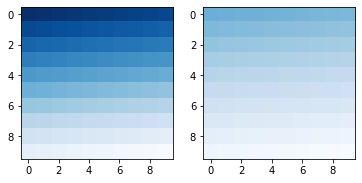

In [8]:
#Create new cmap

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('Blues_r')
new_cmap = truncate_colormap(cmap, 0.5, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

<ipython-input-9-cbf76fab10dc>:22: UserWarning: The following kwargs were not used by contour: 'label'
  m.contour(lon, lat, data_20220320,levels=[0,1],latlon=True, colors=('grey',),linestyles=('--',),linewidths=(3,), zorder=6, label="Sea ice, 20.03.2022")


2022-04-10


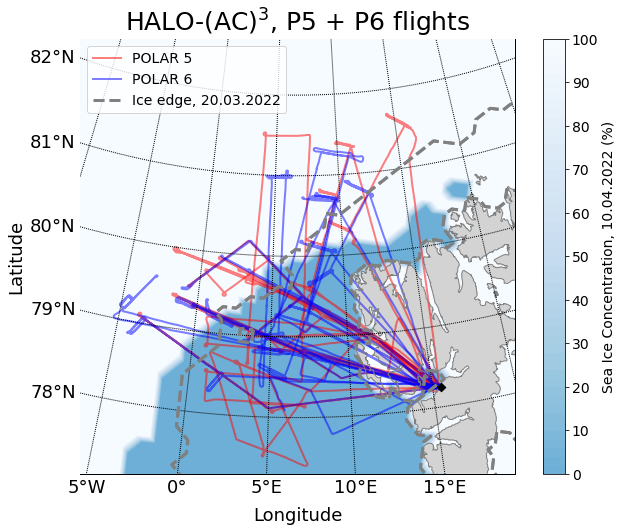

In [9]:
#Plot with nicer ice

#Only AFLUX und ACLOUD

fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='h',
            width=0.6E6, height=0.6E6, 
            lat_0=80.0, lon_0=6.75,)


m.drawmeridians(np.arange(0,360,5),labels=[0,0,0,1],latmax=90, fontsize = 18)
m.drawparallels(np.arange(-90,100,1),labels=[1,0,0,0], fontsize = 18)
m.drawcoastlines(color='grey')
m.drawmapboundary(fill_color='white',zorder=0)
m.fillcontinents(color='lightgrey',lake_color='white',zorder=1)



#Plot ice edge 
cbar = m.contourf(lon, lat, np.where(data_AFLUX>100,100,data_AFLUX),50,latlon=True, cmap=new_cmap)
plt.clim(0, 100)
m.contour(lon, lat, data_20220320,levels=[0,1],latlon=True, colors=('grey',),linestyles=('--',),linewidths=(3,), zorder=6, label="Sea ice, 20.03.2022")
#m.contour(lon, lat, data_ACLOUD,levels=[0,1],latlon=True, colors=('green',),linestyles=('--',),linewidths=(1,))




#Plot the single tracks
#P5
for i in range(len(list_of_files_P5)):
    #data = Load_AWI_GPS(list_of_files_P5[i])
    nav_lat, nav_lon, nav_alt= read_INS_dat(list_of_files_P5[i])
    x,y = m(nav_lon[:],nav_lat[:])
    m.plot(x,y,c="red",zorder=1,alpha=0.5,linewidth=2)
    
    
last_flight = "/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/Polar5_20220410.nav"
nav_time, nav_dt, nav_lon, nav_lat, nav_alt, nav_vel,nav_pitch,nav_roll,nav_yaw,nav_sza,nav_saa = Load_nav_data(last_flight)
x,y = m(nav_lon[:],nav_lat[:])
m.plot(x,y,c="red",zorder=1,alpha=0.5,linewidth=2)

#
##P6
for i in range(len(list_of_files_P6)):
    nav_lat, nav_lon, nav_alt= read_INS_dat(list_of_files_P6[i])
    x,y = m(nav_lon[:],nav_lat[:])
    m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)
    
#p6_08042022
lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-08.csv")
x,y = m(lon_extra[:],lat_extra[:])
m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)

#p6_09042022
lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-09.csv")
x,y = m(lon_extra[:],lat_extra[:])
m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)

#p6_10042022
lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-10.csv")
x,y = m(lon_extra[:],lat_extra[:])
m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)


#
##AFLUX P5
#for i in range(len(list_of_files_AFLUX)):
#    nav_time, nav_dt, nav_lon, nav_lat, nav_alt, nav_vel,nav_pitch,nav_roll,nav_yaw,nav_sza,nav_saa = Load_nav_data(list_of_files_AFLUX[i])
#    x,y = m(nav_lon[:],nav_lat[:])
#    m.plot(x,y,c="red",zorder=1,alpha=0.3, linewidth=1)
#    
##Plot AFLUX parts below 100m
#x,y = m(lon_below_100m_AFLUX[:],lat_below_100m_AFLUX[:])
#m.scatter(x,y,color="red", marker="o",s=3)
#
##Plot ACLOUD parts below 250m
#x,y = m(lon_below_250m_ACLOUD[:],lat_below_250m_ACLOUD[:])
#m.scatter(x,y,color="blue", marker="o",s=3)
    

    

x,y = m(15.496793,78.244423)
m1 = m.scatter(x, y, marker='D',color='black',zorder=7, label="LYR")





#Custon legend
from matplotlib.lines import Line2D

colors = ['red']
lines = [Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors]
labels = ['POLAR 5']
#
colors = ['blue']
lines = lines + ([Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors])
labels = labels + (['POLAR 6'])
#
colors = ['grey']
lines = lines + ([Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors])
labels= labels + (["Ice edge, 20.03.2022"])
#
#colors = ['blue', 'red']
#lines = lines + [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = labels + ['ACLOUD\n(<250m)','AFLUX\n(<100m)']


#
#lines = lines + ([Line2D([0], [0], marker='D', color='black', label='LYR',
#                          markerfacecolor='black', markersize=5,linestyle="")])
labels= labels + (["LYR"])



plt.legend(lines, labels,loc="upper left", fontsize = 14)

#plt.legend()

plt.xlabel("Longitude", fontsize = 18, labelpad=33)
plt.ylabel("Latitude", fontsize = 18, labelpad=55)
plt.title("HALO-(AC)$^3$, P5 + P6 flights", fontsize = 25)

#Colorbar
cb = plt.colorbar(cbar)#,orientation="horizontal")
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()
cb.ax.tick_params(labelsize=14) 
cb.set_label(label='Sea Ice Concentration, 10.04.2022 (%)', size=14)

plt.savefig("HALO_AC3_All_tracks.png",dpi=600,bbox_inches="tight")
plt.show()

In [10]:
#Load flight tracks from HALO

files_HALO = sorted(glob.glob("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/HALO_gps/gps_ins/" + "*.nc"))


<ipython-input-34-37a6b58974fc>:18: UserWarning: The following kwargs were not used by contour: 'label'
  m.contour(lon, lat, data_20220320,levels=[0,1],latlon=True, colors=('grey',),linestyles=('--',),linewidths=(3,), zorder=6, label="Sea ice, 20.03.2022")


2022-04-10


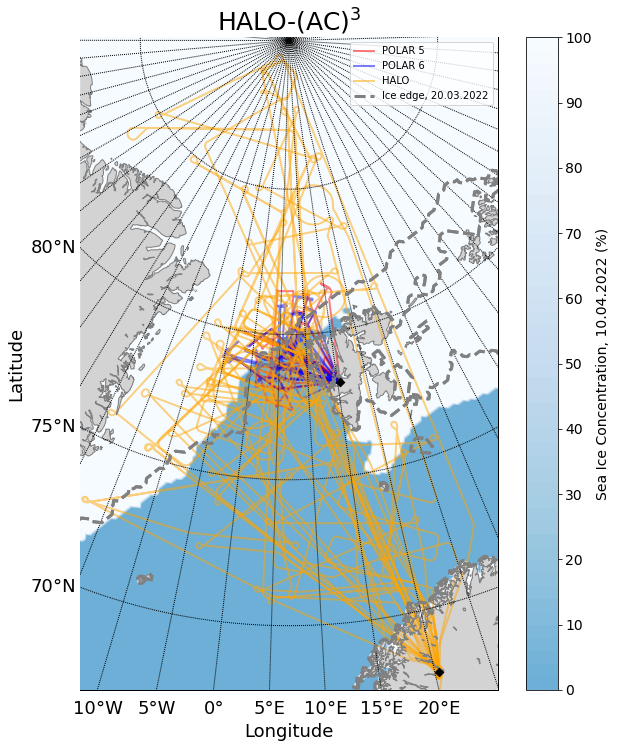

In [34]:
fig = plt.figure(figsize=(10, 12))
m = Basemap(projection='lcc', resolution='h',
            width=1.6E6, height=2.5E6, 
            lat_0=79.0, lon_0=6.75,)


m.drawmeridians(np.arange(0,360,5),labels=[0,0,0,1],latmax=90, fontsize = 18)
m.drawparallels(np.arange(-90,100,5),labels=[1,0,0,0], fontsize = 18)
m.drawcoastlines(color='grey')
m.drawmapboundary(fill_color='white',zorder=0)
m.fillcontinents(color='lightgrey',lake_color='white',zorder=1)



#Plot ice edge 
cbar = m.contourf(lon, lat, np.where(data_AFLUX>100,100,data_AFLUX),50,latlon=True, cmap=new_cmap)
plt.clim(0, 100)
m.contour(lon, lat, data_20220320,levels=[0,1],latlon=True, colors=('grey',),linestyles=('--',),linewidths=(3,), zorder=6, label="Sea ice, 20.03.2022")
#m.contour(lon, lat, data_ACLOUD,levels=[0,1],latlon=True, colors=('green',),linestyles=('--',),linewidths=(1,))




#Plot the single tracks
#P5
for i in range(len(list_of_files_P5)):
    #data = Load_AWI_GPS(list_of_files_P5[i])
    nav_lat, nav_lon, nav_alt= read_INS_dat(list_of_files_P5[i])
    x,y = m(nav_lon[:],nav_lat[:])
    m.plot(x,y,c="red",zorder=1,alpha=0.5,linewidth=2)
    
    
last_flight = "/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/Polar5_20220410.nav"
nav_time, nav_dt, nav_lon, nav_lat, nav_alt, nav_vel,nav_pitch,nav_roll,nav_yaw,nav_sza,nav_saa = Load_nav_data(last_flight)
x,y = m(nav_lon[:],nav_lat[:])
m.plot(x,y,c="red",zorder=1,alpha=0.5,linewidth=2)

#
##P6
for i in range(len(list_of_files_P6)):
    nav_lat, nav_lon, nav_alt= read_INS_dat(list_of_files_P6[i])
    x,y = m(nav_lon[:],nav_lat[:])
    m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)
    
#p6_08042022
lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-08.csv")
x,y = m(lon_extra[:],lat_extra[:])
m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)

#p6_09042022
lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-09.csv")
x,y = m(lon_extra[:],lat_extra[:])
m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)

#p6_10042022
lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-10.csv")
x,y = m(lon_extra[:],lat_extra[:])
m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)




#HALO
for i in range(len(files_HALO)):
    track_HALO = xr.load_dataset(files_HALO[i])
    lat = track_HALO["lat"].values
    lon = track_HALO["lon"].values

    x,y = m(lon[:],lat[:])
    m.plot(x,y,c="orange",zorder=1,alpha=0.5,linewidth=2)

#
##AFLUX P5
#for i in range(len(list_of_files_AFLUX)):
#    nav_time, nav_dt, nav_lon, nav_lat, nav_alt, nav_vel,nav_pitch,nav_roll,nav_yaw,nav_sza,nav_saa = Load_nav_data(list_of_files_AFLUX[i])
#    x,y = m(nav_lon[:],nav_lat[:])
#    m.plot(x,y,c="red",zorder=1,alpha=0.3, linewidth=1)
#    
##Plot AFLUX parts below 100m
#x,y = m(lon_below_100m_AFLUX[:],lat_below_100m_AFLUX[:])
#m.scatter(x,y,color="red", marker="o",s=3)
#
##Plot ACLOUD parts below 250m
#x,y = m(lon_below_250m_ACLOUD[:],lat_below_250m_ACLOUD[:])
#m.scatter(x,y,color="blue", marker="o",s=3)
    

    

x,y = m(15.496793,78.244423)
m1 = m.scatter(x, y, marker='D',color='black',zorder=7, label="LYR")



x,y = m(20.33616929572912,67.82168328837079)
m1 = m.scatter(x, y, marker='D',color='black',zorder=7, label="Kiruna")



#Custon legend
from matplotlib.lines import Line2D

colors = ['red']
lines = [Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors]
labels = ['POLAR 5']
#
colors = ['blue']
lines = lines + ([Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors])
labels = labels + (['POLAR 6'])
#
colors = ['orange']
lines = lines + ([Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors])
labels = labels + (['HALO'])
#
colors = ['grey']
lines = lines + ([Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors])
labels= labels + (["Ice edge, 20.03.2022"])
#
#colors = ['blue', 'red']
#lines = lines + [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = labels + ['ACLOUD\n(<250m)','AFLUX\n(<100m)']


#
#lines = lines + ([Line2D([0], [0], marker='D', color='black', label='LYR',
#                          markerfacecolor='black', markersize=5,linestyle="")])
labels= labels + (["LYR"])



plt.legend(lines, labels,loc="upper right", fontsize = 10)

#plt.legend()

plt.xlabel("Longitude", fontsize = 18, labelpad=33)
plt.ylabel("Latitude", fontsize = 18, labelpad=55)
plt.title("HALO-(AC)$^3$", fontsize = 25)

#Colorbar
cb = plt.colorbar(cbar)#,orientation="horizontal")
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()
cb.ax.tick_params(labelsize=14) 
cb.set_label(label='Sea Ice Concentration, 10.04.2022 (%)', size=14)

plt.savefig("HALO_AC3_All_tracks_inclHALO.png",dpi=600,bbox_inches="tight")
plt.show()

In [ ]:
lat_cmap = lat.copy()
lon_cmap = lon.copy()

<ipython-input-61-d0da2287c8ec>:22: UserWarning: The following kwargs were not used by contour: 'label'
  m.contour(lon, lat, data_20220320,levels=[0,1],latlon=True, colors=('grey',),linestyles=('--',),linewidths=(3,), zorder=6, label="Sea ice, 20.03.2022")


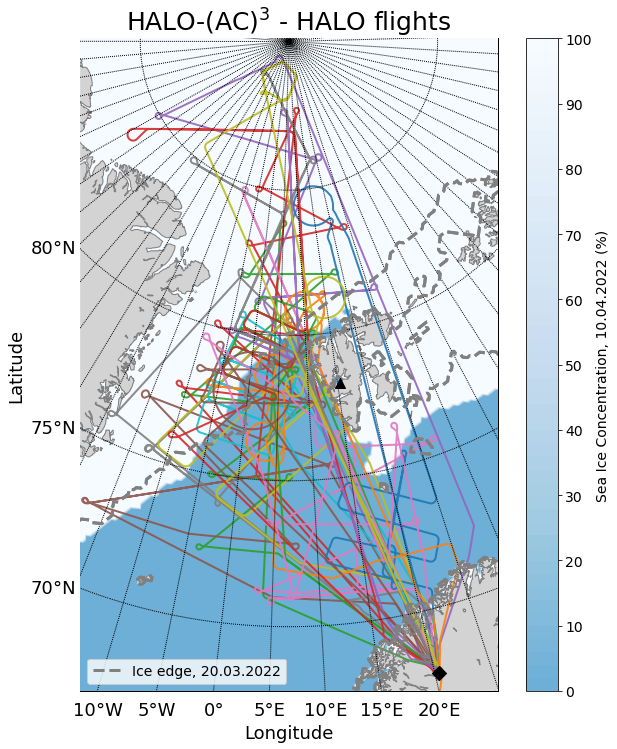

In [61]:
###Just HALO



fig = plt.figure(figsize=(10, 12))
m = Basemap(projection='lcc', resolution='h',
            width=1.6E6, height=2.5E6, 
            lat_0=79.0, lon_0=6.75,)


m.drawmeridians(np.arange(0,360,5),labels=[0,0,0,1],latmax=90, fontsize = 18)
m.drawparallels(np.arange(-90,100,5),labels=[1,0,0,0], fontsize = 18)
m.drawcoastlines(color='grey')
m.drawmapboundary(fill_color='white',zorder=0)
m.fillcontinents(color='lightgrey',lake_color='white',zorder=1)



#Plot ice edge 
cbar = m.contourf(lon, lat, np.where(data_AFLUX>100,100,data_AFLUX),50,latlon=True, cmap=new_cmap)
plt.clim(0, 100)
m.contour(lon, lat, data_20220320,levels=[0,1],latlon=True, colors=('grey',),linestyles=('--',),linewidths=(3,), zorder=6, label="Sea ice, 20.03.2022")
#m.contour(lon, lat, data_ACLOUD,levels=[0,1],latlon=True, colors=('green',),linestyles=('--',),linewidths=(1,))




#Plot the single tracks
#P5
#for i in range(len(list_of_files_P5)):
#    #data = Load_AWI_GPS(list_of_files_P5[i])
#    nav_lat, nav_lon, nav_alt= read_INS_dat(list_of_files_P5[i])
#    x,y = m(nav_lon[:],nav_lat[:])
#    m.plot(x,y,c="red",zorder=1,alpha=0.5,linewidth=2)
#    
#    
#last_flight = "/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/Polar5_20220410.nav"
#nav_time, nav_dt, nav_lon, nav_lat, nav_alt, nav_vel,nav_pitch,nav_roll,nav_yaw,nav_sza,nav_saa = Load_nav_data(last_flight)
#x,y = m(nav_lon[:],nav_lat[:])
#m.plot(x,y,c="red",zorder=1,alpha=0.5,linewidth=2)

#
##P6
#for i in range(len(list_of_files_P6)):
#    nav_lat, nav_lon, nav_alt= read_INS_dat(list_of_files_P6[i])
#    x,y = m(nav_lon[:],nav_lat[:])
#    m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)
#    
##p6_08042022
#lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-08.csv")
#x,y = m(lon_extra[:],lat_extra[:])
#m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)
#
##p6_09042022
#lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-09.csv")
#x,y = m(lon_extra[:],lat_extra[:])
#m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)
#
##p6_10042022
#lat_extra, lon_extra = Read_planet_history_csv("/Users/marcusklingebiel/Documents/Campaigns/HALO_AC3/Quicklook_Programs/raw_data/AWI_nav/AWI6_track_2022-04-10.csv")
#x,y = m(lon_extra[:],lat_extra[:])
#m.plot(x,y,c="blue",zorder=1,alpha=0.5,linewidth=2)




#HALO
for i in range(len(files_HALO)):
    track_HALO = xr.load_dataset(files_HALO[i])
    lat = track_HALO["lat"].values
    lon = track_HALO["lon"].values

    x,y = m(lon[:],lat[:])
    m.plot(x,y,zorder=1,alpha=0.9,linewidth=2)

#
##AFLUX P5
#for i in range(len(list_of_files_AFLUX)):
#    nav_time, nav_dt, nav_lon, nav_lat, nav_alt, nav_vel,nav_pitch,nav_roll,nav_yaw,nav_sza,nav_saa = Load_nav_data(list_of_files_AFLUX[i])
#    x,y = m(nav_lon[:],nav_lat[:])
#    m.plot(x,y,c="red",zorder=1,alpha=0.3, linewidth=1)
#    
##Plot AFLUX parts below 100m
#x,y = m(lon_below_100m_AFLUX[:],lat_below_100m_AFLUX[:])
#m.scatter(x,y,color="red", marker="o",s=3)
#
##Plot ACLOUD parts below 250m
#x,y = m(lon_below_250m_ACLOUD[:],lat_below_250m_ACLOUD[:])
#m.scatter(x,y,color="blue", marker="o",s=3)
    

    

x,y = m(15.496793,78.244423)
m1 = m.scatter(x, y, marker='^', s=100,color='black',zorder=7, label="LYR")



x,y = m(20.33616929572912,67.82168328837079)
m1 = m.scatter(x, y, marker='D', s=100,color='black',zorder=7, label="Kiruna")



#Custon legend
from matplotlib.lines import Line2D

#colors = ['red']
#lines = [Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors]
#labels = ['POLAR 5']
##
#colors = ['blue']
#lines = lines + ([Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors])
#labels = labels + (['POLAR 6'])
##
#colors = ['orange']
#lines = lines + ([Line2D([0], [0], color=c, linewidth=2,alpha=0.5, linestyle='-') for c in colors])
#labels = labels + (['HALO'])
##
colors = ['grey']
lines = ([Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors])
labels= (["Ice edge, 20.03.2022"])
#
#colors = ['blue', 'red']
#lines = lines + [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = labels + ['ACLOUD\n(<250m)','AFLUX\n(<100m)']


#
#lines = lines + ([Line2D([0], [0], marker='D', color='black', label='LYR',
#                          markerfacecolor='black', markersize=5,linestyle="")])
#labels= labels + (["LYR"])



plt.legend(lines, labels, loc="lower left", fontsize = 14)

#plt.legend()

plt.xlabel("Longitude", fontsize = 18, labelpad=33)
plt.ylabel("Latitude", fontsize = 18, labelpad=55)
plt.title("HALO-(AC)$^3$ - HALO flights", fontsize = 25)

#Colorbar
cb = plt.colorbar(cbar)#,orientation="horizontal")
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()
cb.ax.tick_params(labelsize=14) 
cb.set_label(label='Sea Ice Concentration, 10.04.2022 (%)', size=14)

plt.savefig("HALO_AC3_All_tracks_just_HALO.png",dpi=600,bbox_inches="tight")
plt.show()